# A. Import Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns

In [3]:
df = pd.read_csv("ingredient.csv")

In [4]:
df.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
a    214 non-null float64
b    214 non-null float64
c    214 non-null float64
d    214 non-null float64
e    214 non-null float64
f    214 non-null float64
g    214 non-null float64
h    214 non-null float64
i    214 non-null float64
dtypes: float64(9)
memory usage: 15.1 KB


In [6]:
df.shape, df.size

((214, 9), 1926)

# B. Descriptive Analytics

## B.1 Calculating Central Tendencies

In [7]:
df.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [8]:
#checking null data field
df.isnull().sum()

a    0
b    0
c    0
d    0
e    0
f    0
g    0
h    0
i    0
dtype: int64

### Findings
The data has 214 rows and 9 columns.
It has no null field.

## B.2 Correlation Check

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:19: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.6.1

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


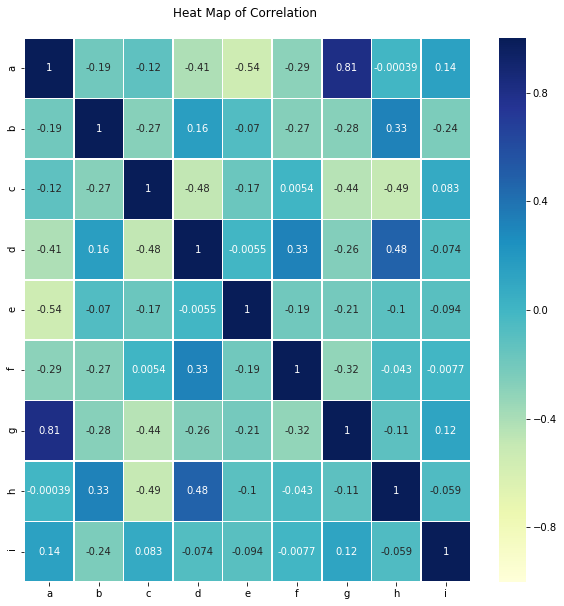

In [9]:
corr = df.corr();
# print(corr)
# sns.heatmap(corr, annot = True);
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
plt.title('Heat Map of Correlation \n')
sns.heatmap(corr,annot=True,cmap='YlGnBu',vmin=-1,vmax=1, linewidths=.5, center=0);

In [10]:
# df.corr()

### Findings:
Additives "a" and "g" has high correlation (0.81). Kita bisa pilih salah satu untuk mengurangi the curse of high dimensionality data.

## B.3 Check if Each Column is Normally Distributed 

In [11]:
from scipy.stats import shapiro

#normality test
def check_normality(data):
    stat, p = shapiro(data)
#     print(stat, p)
    
    alpha = 0.05
    if p > alpha:
        print('Sample looks "Normally Distributed"')
    else:
        print('Sample does not look "Normally Distributed"')
        
def draw_graph(the_column):
    #draw distribution
    mean = df[the_column].mean()
    median = df[the_column].median()
    #mode = df[the_column].mode() # we don't need to find the mode because of the data type
    fig, ax = plt.subplots(figsize=(10,6))

    sns.distplot(df[the_column])
    plt.title('Distribution Plot of Additive: '+ column)
    plt.axvline(mean,color='green',label='Mean')
    plt.axvline(median,color='blue',label='Median')
    plt.legend()
    plt.plot()

additives a:
Sample does not look "Normally Distributed"
-------------
additives b:
Sample does not look "Normally Distributed"
-------------
additives c:
Sample does not look "Normally Distributed"
-------------
additives d:
Sample does not look "Normally Distributed"
-------------
additives e:
Sample does not look "Normally Distributed"
-------------
additives f:
Sample does not look "Normally Distributed"
-------------
additives g:
Sample does not look "Normally Distributed"
-------------
additives h:
Sample does not look "Normally Distributed"
-------------
additives i:
Sample does not look "Normally Distributed"
-------------


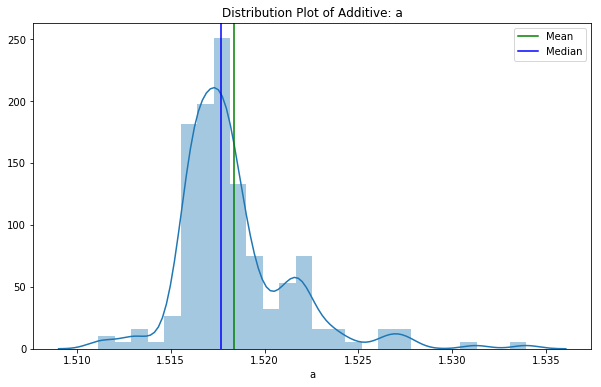

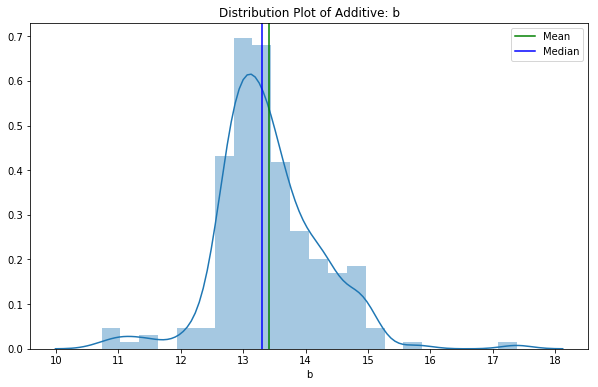

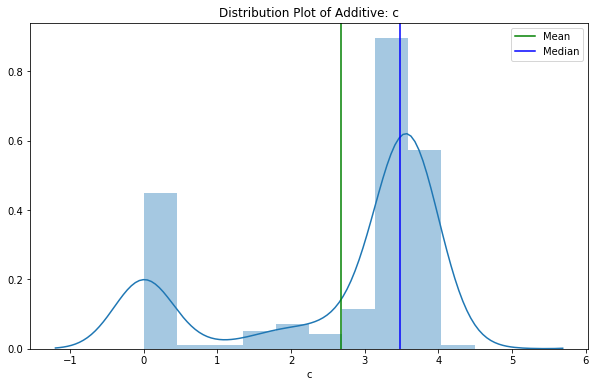

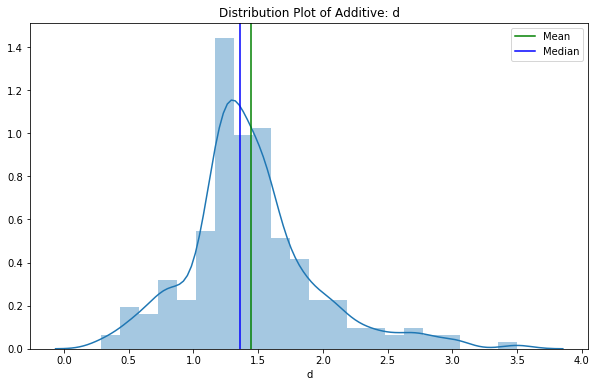

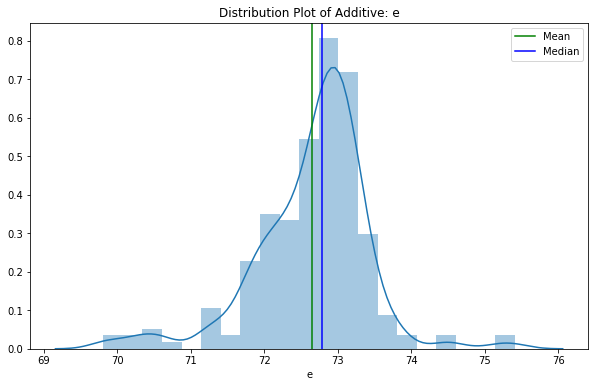

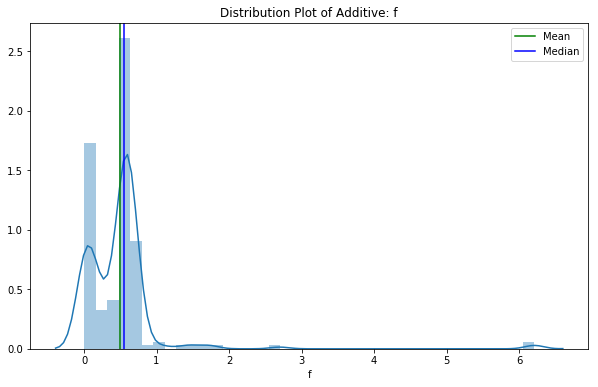

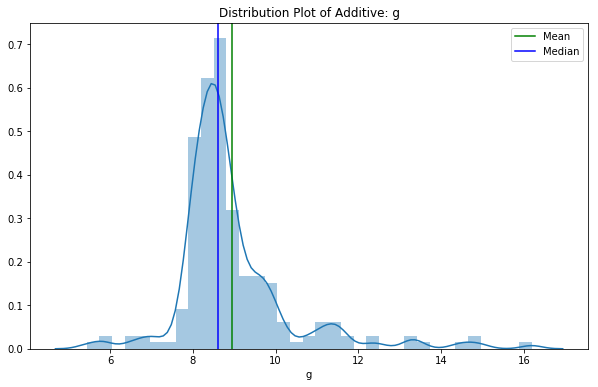

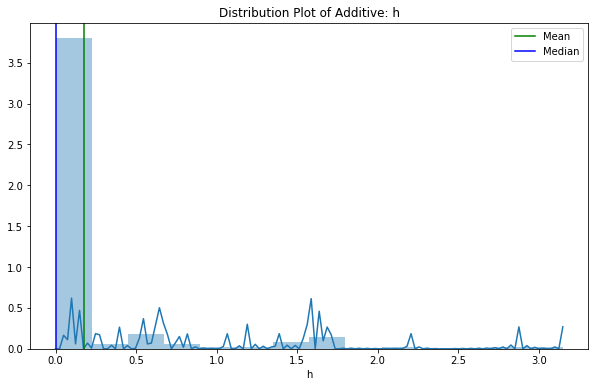

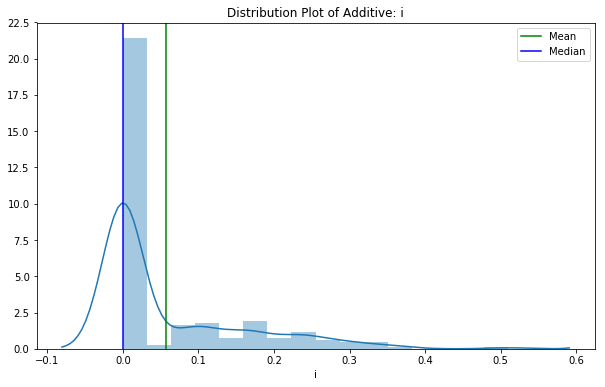

In [12]:
for column in df.columns:
    print('additives %s:' % column)
    check_normality(df[column])
    draw_graph(column)
    print('-------------')

### Findings
From Shapiro-Wilk Test, we found that none of the additives has normal distribution. Thus, all of those additives ("a" to "i") are considered as _non-parametric_.  

## B.4 Checking Outliers

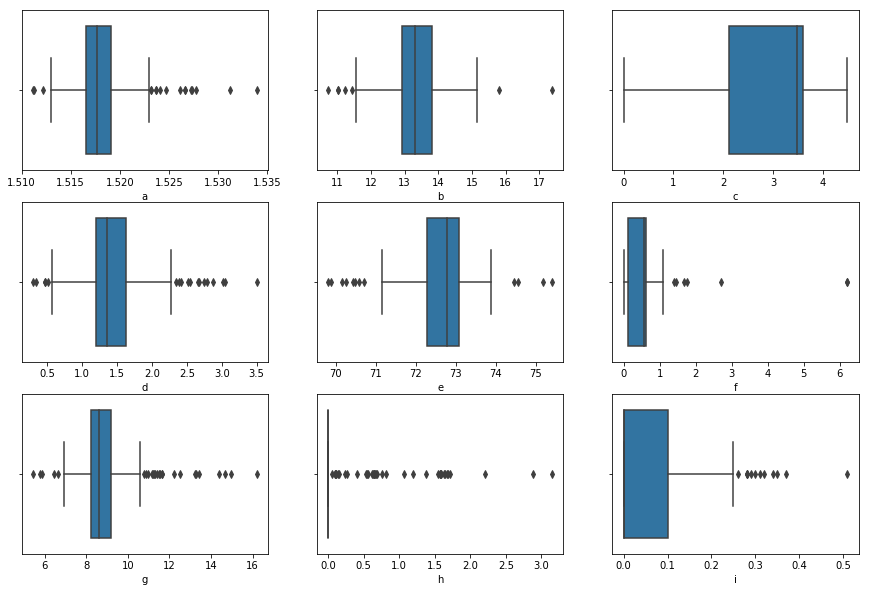

In [13]:
plt.figure(figsize=(15,10))
pos = 1
for col in df.columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(df[col])
    pos += 1

# C. Clustering Additives
To determine distinctive number of formulations (cluster of formulations) present in the dataset, we can use inertia value from K-means and "elbow rule".

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import numpy as np

### C.1 Scaling Data

In [15]:
X = df
scaler = MinMaxScaler()
scaler.fit(X)

X = scaler.transform(X)
inertia = []

In [16]:
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=39)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

In [17]:
inertia

[57.36422131848858,
 34.13198335061759,
 28.604109981626376,
 23.710052312425525,
 21.065150550090998,
 18.34215153424278,
 16.747479189869004,
 14.79905977404048,
 13.65785487749024]

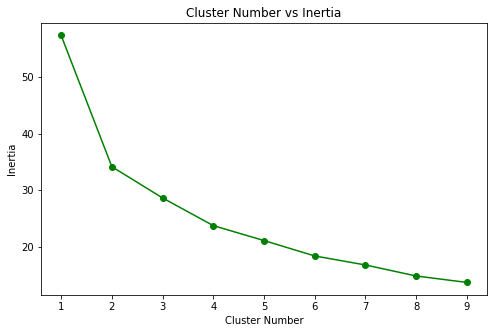

In [18]:
plt.figure(figsize=(8,5))
plt.title('Cluster Number vs Inertia')
plt.xlabel('Cluster Number')
plt.ylabel('Inertia')
plt.plot(range(1,10), inertia, 'go-')
plt.show()

We have to select the value of k at the "elbow" ie the point after which the distortion/inertia start decreasing in a linear fashion. 

Thus for the given data, we conclude that the optimal number of clusters for the data is 2 or 3.

### Findings
*Thus, there are around 2 or 3 distinctive number of formulations present in the dataset.*